# Tarea 4

## Sección A1

**Pregunta 1: Explique por qué un segmento de recta de [−1, 1] representa a una esfera unidimensional y por qué un cuadrado de -1 a 1 en x y de -1 a 1 en y es un cilindro unitario en dos dimensiones (en dos oraciones).**

Sabemos que para una esfera de radio = 1, $V(d) = \frac{pi}{d/2}V(d-2)$, entonces para una *esfera* unidimensional(d=1) tenemos que **V(1) = 2**, que se puede leer como el volumen de la esfera unidimensional(longuitud de la recta). El volumen del cilindro de dimension d-1 es el doble del volumen de una esfera en dimension d, por lo tanto para el *cilindro* **V(2) = 4** (cuadrado de -1 a 1 en x & y)

**Pregunta 2: Confirme y explique que el cilindro unitario en dos dimensiones tiene el doble del volumen de la esfera unitaria
en una dimensión (en dos oraciones).**

Esto se puede explicar sabiendo que el cilindo de 2 dimensiones es formado por una esfera unitaria de dimension 1 (V = 2) y un segmento de linea sobre un eje de longitud 2, por lo tanto el cilindro de 2 dimensiones tiene V = 4.

**Pregunta 3: Explique (demuestre) las siguientes relaciones:**

* $Vcyl(2) = 2Vsph(1)$
* $Vcyl(3) = 2Vsph(2)$

Como sabemos que que las relaciones anteriores son ciertas para dimensiones arbitrarias entonces se puede segui que:

* $Vcyl(4) = 2Vsph(3)$
* $Vcyl(5) = 2Vsph(4)$
* .
* .
* .
* $Vcyl(d) = 2Vsph(d-1)$
* $Vcyl(d+1) = 2Vsph(d)$

**Pregunta 4: En la expresión anterior Q(d) es igual al doble del volumen de la esfera en d dimensiones dividida por el volumen
del cilindro en d dimensiones. Pruebe que Q(d) es igual a la razón del volumen de la esfera en d dimensiones
entre el volumen de la esfera en (d − 1) dimensiones**

Sabemos que lo siguiente es cierto:

$$Q(d) = 2\frac{Vsph(d)}{Vcyl(d)}$$

y también sabemos que:

$$Vcyl(d) = 2Vsph(d-1)$$

por lo tanto remplazando en la primera ecuación comprobamos que:

$$Q(d) = \frac{Vsph(d)}{Vsph(d-1)}$$

## Sección A2

**Programa a2**

In [ ]:
import random
x, y = 0.0, 0.0
delta = 1.0
n_trials = 2**12
n_hits = 0
for i in range(n_trials):
    del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
    z = random.uniform(-1.0, 1.0)
    if (x + del_x)**2 + (y + del_y)**2 < 1.0:
        x, y = x + del_x, y + del_y
    if x**2 + y**2 + z**2 < 1.0: n_hits += 1
print 4.0 * n_hits / float(n_trials)

Ahora vamos a calcular Q3 promedio, modificando el print de la linea 12

In [3]:
import random
x, y = 0.0, 0.0
delta = 1.0
n_trials = 2**12
n_hits = 0
for i in range(n_trials):
    del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
    z = random.uniform(-1.0, 1.0)
    if (x + del_x)**2 + (y + del_y)**2 < 1.0:
        x, y = x + del_x, y + del_y
    if x**2 + y**2 + z**2 < 1.0: n_hits += 1
print 2.0 * n_hits / float(n_trials) #deberia ser aproximado a 4/3 ~ 1.3333

1.3359375


## Sección A3

Calculo promedio de Q4

In [5]:
import random
x, y = 0.0, 0.0
delta = 1.0
n_trials = 2**12
n_hits = 0
for i in range(n_trials):
    del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
    z = random.uniform(-1.0, 1.0)
    alpha_value = random.uniform(-1.0, 1.0)
    if (x + del_x)**2 + (y + del_y)**2 < 1.0:
        x, y = x + del_x, y + del_y
    if x**2 + y**2 + z**2 + alpha_value**2 < 1.0: n_hits += 1
print 3.0 * n_hits / float(n_trials) #debe de ser cercano a 3*pi/8 ~ 1.178

1.17846679688


**Pregunta: Verifique que el volumen V sph (d = 4) de la esfera unitaria 4-dimensional puede ser dada por tres ecuaciones
equivalentes:**

* $Vsph(4) = \frac{pi^{2}}{2}$
* $Vsph(4) = Vsph(3)*Q4$
* $Vsph(4) = Vsph(2)*Q3*Q4$

**1.** La primera relación la podemos resolver desde la definicion de Vsph:

$$Vsph(d) = \frac{pi^{d/2}}{gamma(d/2 + 1)}$$

Para nuestro caso $d = 4$, entonces:

$$Vsph(4) = \frac{pi^{2}}{gamma(3)}$$

sabemos que: $$gamma(3) = 2$$

entonces: $$Vsph(4) = \frac{pi^{2}}{2} $$

**2.**

$$Vsph(4) = Vsph(3)*Q4 = Vsph(3)*\frac{Vsph(4)}{Vsph(3)} = Vsph(4)$$

**3.**

$$Vsph(4) = Vsph(2)*Q3*Q4 = Vsph(2)*\frac{Vsph(3)}{Vsph(2)}*\frac{Vsph(4)}{Vsph(3)} = Vsph(4)$$

## Sección B1

Generalice el programa markov_pi.py para implementar un algoritmo eficiente de Monte Carlo para hacer un
muestreo de puntos uniformemente distribuidos dentro de una esfera unitaria d-dimensional.

In [33]:
import random
import pylab
import numpy as np
d = 2
x = [0]*d
delta = 1.0
n_trials = 2**12
n_hits = 0
x_sum_square = 0
new_radius_square = 0.0

for i in range(n_trials):
	k = random.randint(0, d-1)
	x_new_k = x[k] + random.uniform(-delta, delta)
	if abs(x_new_k) < 1.0:
		new_radius_square = new_radius_square - x[k]**2 + x_new_k**2
		x[k] = x_new_k
	if new_radius_square < 1.0 : 
		n_hits += 1
print (n_hits / float(n_trials))*(2.0)**d #calcula pi

3.1474609375


El codigo de arriba funciona para cualquier dimensión.

* Histograma para $d=4$

5.08984375
[0.50980049863829646]
[0.50980049863829646, 0.15193735132293007]
[0.50980049863829646, 0.15193735132293007, 0.85515622165566496]
[0.50980049863829646, 0.15193735132293007, 0.85515622165566496, 0.91180920850089042]


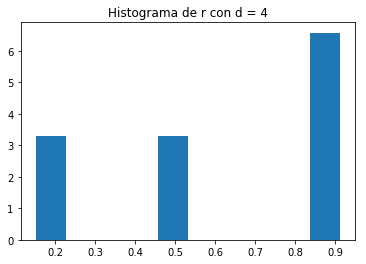

In [36]:
import random
import pylab
import numpy as np
d = 4
x = [0]*d
delta = 1.0
n_trials = 2**12
n_hits = 0
x_sum_square = 0
new_radius_square = 0.0

for i in range(n_trials):
	k = random.randint(0, d-1)
	x_new_k = x[k] + random.uniform(-delta, delta)
	if abs(x_new_k) < 1.0:
		new_radius_square = new_radius_square - x[k]**2 + x_new_k**2
		x[k] = x_new_k
	if new_radius_square < 1.0 : 
		n_hits += 1
print (n_hits / float(n_trials))*(2.0)**d

r = []
for i in x:
	x_sum_square = i**2
	r.append(np.sqrt(x_sum_square))
	print r

pylab.hist(r, normed = True)
pylab.title("Histograma de r con d = 4")
pylab.show()

* Gráfica anlítica de $4x^{3}$ con $0< x <1$

![title](plot4.png)

* Histograma para $d=20$

1280.0


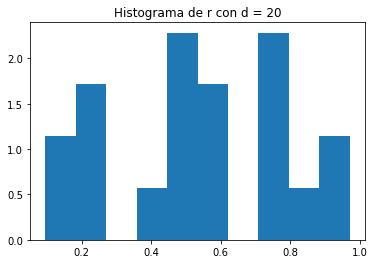

In [37]:
import random
import pylab
import random
import pylab
import numpy as np
d = 20
x = [0]*d
delta = 1.0
n_trials = 2**12
n_hits = 0
x_sum_square = 0
new_radius_square = 0.0

for i in range(n_trials):
	k = random.randint(0, d-1)
	x_new_k = x[k] + random.uniform(-delta, delta)
	if abs(x_new_k) < 1.0:
		new_radius_square = new_radius_square - x[k]**2 + x_new_k**2
		x[k] = x_new_k
	if new_radius_square < 1.0 : 
		n_hits += 1
print (n_hits / float(n_trials))*(2.0)**d

r = []
for i in x:
	x_sum_square = i**2
	r.append(np.sqrt(x_sum_square))
	#print r

pylab.hist(r,normed = True)
pylab.title("Histograma de r con d = 20")
pylab.show()

* Gráfica anlítica de $20x^{19}$ con $0< x <1$

![title](plot20.png)

## Sección B2

In [31]:
import random
import pylab
import numpy as np

d = 4
delta = 1.0
n_trials = 2**12

def vol_sph(d, n_trials, delta):
	x = [0]*d
	n_hits = 0
	new_radius_square = 0.0
	for i in range(n_trials):
		k = random.randint(0, d-1)
		x_new_k = x[k] + random.uniform(-delta, delta)
		if abs(x_new_k) < 1.0:
			new_radius_square = new_radius_square - x[k]**2 + x_new_k**2
			x[k] = x_new_k
		if new_radius_square < 1.0 : 
			n_hits += 1
	return n_hits / float(n_trials)*2.0**d

q4 = vol_sph(4, n_trials, delta)/vol_sph(3, n_trials, delta)
print "Valor Q4 = " + str(q4)

q200 = vol_sph(200, n_trials, delta)/vol_sph(199, n_trials, delta)
print "Valor Q200 = " + str(q200)

Valor Q4 = 1.18547986077
Valor Q200 = 0.666666666667


De forma analitica lo acalculamos de la siguiente manera

In [18]:
import math

def V_sph(dim):
    return math.pi ** (dim / 2.0) / math.gamma(dim / 2.0 + 1.0)

print "Valor analitico Q4 = " + str(V_sph(4)/V_sph(3))
print "Valor analitico Q200 = " + str(V_sph(200)/V_sph(199))

Valor analitico Q4 = 1.1780972451
Valor analitico Q200 = 0.177023967696


Nuestro programa se aproxima bastante bien al valor analitico de $Q4$, pero falla bastante para $Q200$

**Pregunta:** Dé su resultado para V sph (4)/V sph (3) lo más preciso posible. Compárelo con el resultado obtenido en la sección
A3.

El resultado más preciso de $\frac{Vsph(4)}{Vsph(3)}$ = 1.18547986077  que difiere un poco con el obtenido en A3, 1.17846679688, el cual se aproxima mejor al valor analítico

**Pregunta:** Dé su resultado de V sph (200)/V sph (199)

Valor Q200 = 0.666666666667 resulta no se tan buena aproximación ya que el valor analítico es 0.177023967696

## Sección C1

**Pregunta:** Use los valores que calculó iterativamente de Q(d + 1) para evaluar V sph (4) una vez más (empiece desde el valor
V sph = 2). Escriba su resultado y compárelo con $pi^{2}/2$

El resultado encontrado es 4.81077034945, el cual es bastante aproximado al valor real $pi^{2}/2$ ~ 4.9348022

In [ ]:
import random
import pylab
import numpy as np

dimension = 200
delta = 1.0
n_trials = 2**12

def vol_sph(d, n_trials, delta):
	x = [0]*d
	n_hits = 0
	new_radius_square = 0.0
	for i in range(n_trials):
		k = random.randint(0, d-1)
		x_new_k = x[k] + random.uniform(-delta, delta)
		if abs(x_new_k) < 1.0:
			new_radius_square = new_radius_square - x[k]**2 + x_new_k**2
			x[k] = x_new_k
		if new_radius_square < 1.0 : 
			n_hits += 1
	return n_hits / float(n_trials)*2.0**d

def calc_vol_sph(d, n_trials, delta):
	q = 1
	for i in range(1, d):
		q *= vol_sph(i+1, n_trials, delta)/vol_sph(i, n_trials, delta)
	return 2*q

# v_sph = calc_vol_sph(dimension, n_trials, delta)
# print v_sph

vec = []
for j in range(1, dimension+1):
	vec.append(calc_vol_sph(j, n_trials, delta))
pylab.plot(vec)
pylab.yscale("log")
pylab.title("Volumen de esfera unitaria en funcion de la dimension")
pylab.xlabel("dimension (d)")
pylab.ylabel("log(volumen)")
pylab.show()

Resultado de Vsph(200) = 7.39157293101e+52

Grafica para d = 200, vemos que al inicio parece comportarse bien pero mientras empieza a incrementar d se distirciona.

![title](figure_1.png)

Grafico con d = 50

![title](figure_2.png)

Grafica analítica

![title](figure_3.png)

## Sección C2